In [31]:
import pandas as pd
import numpy as np
import datetime
import h5py
import pickle
from collections import defaultdict

from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

In [32]:
data = pd.read_csv('CTU-13-Dataset/capture20110810.binetflow')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt


In [4]:
data['TotPkts'].min(), data['TotPkts'].max()

(1, 2686731)

In [33]:
data['StartTime'] = pd.to_datetime(data['StartTime'])

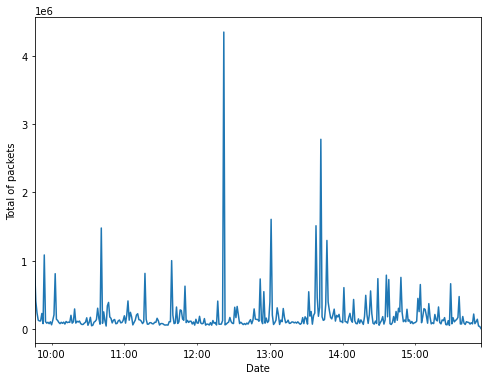

In [36]:
data.resample('T', on='StartTime').sum()['TotPkts'].plot()
plt.xlabel('Date')
plt.ylabel('Total of packets')
plt.savefig('Fig16.png')
plt.show()

In [34]:
tmp = data.resample('5T', on='StartTime').sum()['TotPkts']
target = tmp[tmp == 4664716].index
target

DatetimeIndex(['2011-08-10 12:20:00'], dtype='datetime64[ns]', name='StartTime', freq='5T')

In [ ]:
data[data['StartTime']]

In [37]:
target = target.to_pydatetime()[0]
target

datetime.datetime(2011, 8, 10, 12, 20)

In [38]:
target + datetime.timedelta(minutes=1)
lower = target - datetime.timedelta(minutes=10)
upper = target + datetime.timedelta(minutes=10)
lower, upper

(datetime.datetime(2011, 8, 10, 12, 10),
 datetime.datetime(2011, 8, 10, 12, 30))

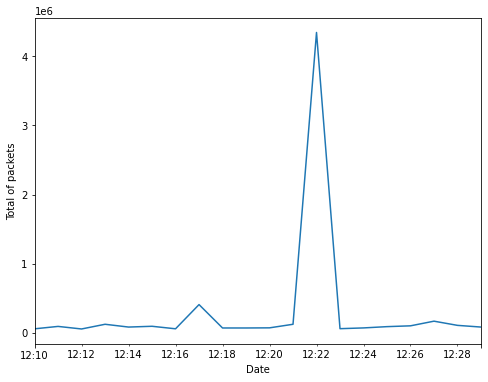

In [39]:
attacked = data[(data['StartTime'] > lower) & (data['StartTime'] < upper)]
attacked.resample('T', on='StartTime').sum()['TotPkts'].plot()
plt.xlabel('Date')
plt.ylabel('Total of packets')
plt.savefig('Fig17.png')
plt.show()